<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<div style="text-align: center;">
    <img src="https://i.postimg.cc/TY9Gcvyz/e3df4358-db5d-4cb7-ad46-25cbad2afb02-cleanup.png" alt="Cleanup image">
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

In [5]:
df = pd.read_csv("Diwali Sales.csv", encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

This dataset contains 11251 rows and 15 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [8]:
# Dropping unwanted Columns

df.drop(columns=['Status', 'unnamed1'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
# Checking null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# handling null values - we'll drop them 

df.dropna(inplace=True)

In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
# Checking duplicate values

df.duplicated().sum()

8

In [14]:
# Dropping duplicate values

df.drop_duplicates(inplace=True)

In [15]:
df.shape

(11231, 13)

In [16]:
# Changing the Data type of Amount Column

df['Amount'] = df['Amount'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [18]:
# we will change Marital Status Column's values from 0 & 1 to Unmarried & Married and
# Gender Column's values from F & M to Female & Male for understanding the visualizations in a better way

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried', 1:'Married'})
df['Gender'] = df['Gender'].replace({'M':'Male', 'F':'Female'})

In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [20]:
# checking Statistics of the dataset

df.describe()

,User_ID,Age,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,2.489093,9454.084676
std,1.716055e+03,12.756116,1.114880,5221.728074
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

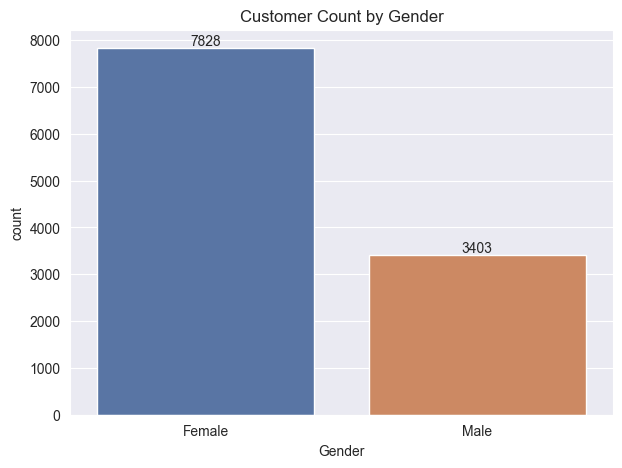

In [22]:
# Gender Countplot

sns.set({'figure.figsize':(7,5)})
ax = sns.countplot(x='Gender', data=df)
plt.title("Customer Count by Gender")
for bars in ax.containers:
    ax.bar_label(bars)

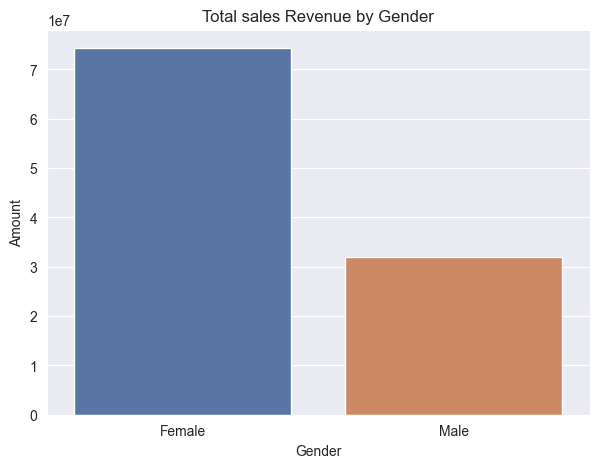

In [23]:
# Amount spent by Gender

amount_spent_gender = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total sales Revenue by Gender")
plt.ylabel("Total Sales Amount in ten-millions")
sns.barplot(x='Gender', y='Amount', data=amount_spent_gender)
plt.show()

#### Insights from Gender
from the above graph we can see that females are more intersted than men in this sale. Also the purchasing power of female is higher than male as the total sales revenue generated from female is much higher than male.

# Age group

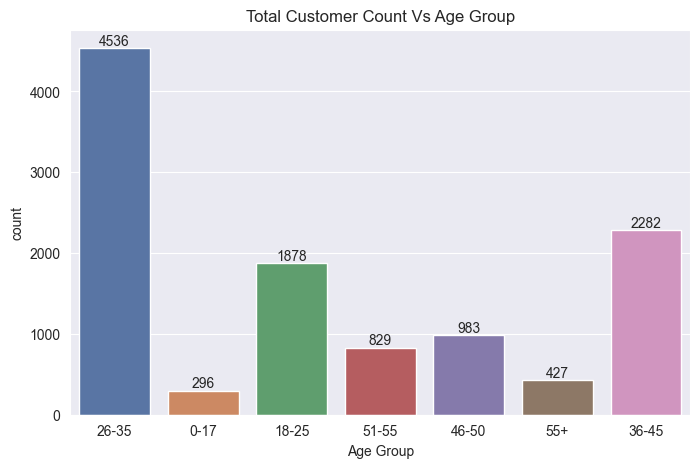

In [24]:
# Age Group Count 

sns.set({'figure.figsize':(8,5)})
ax = sns.countplot(x='Age Group', data=df)
plt.title("Total Customer Count Vs Age Group")
for bars in ax.containers:
    ax.bar_label(bars)

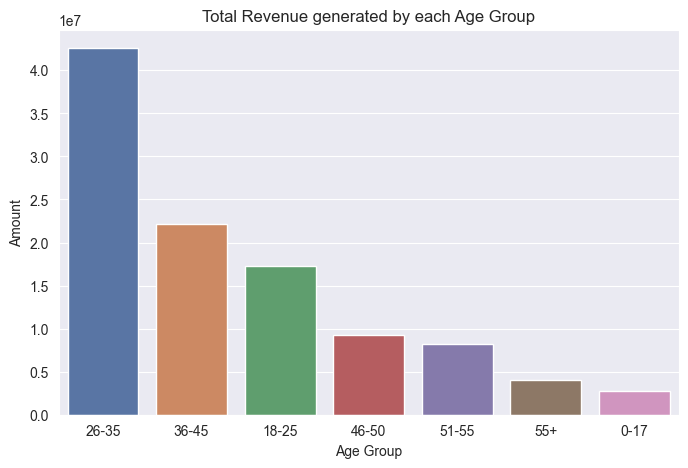

In [25]:
# Amount Spent by Age Group

revenue_age_group = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total Revenue generated by each Age Group")
sns.barplot(x='Age Group', y='Amount', data=revenue_age_group)
plt.show()

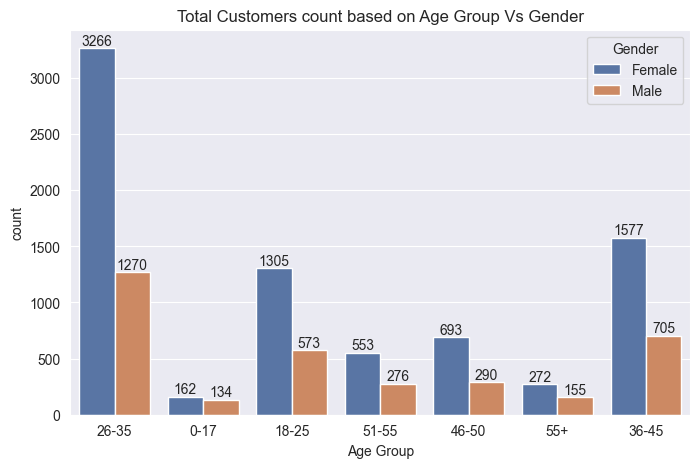

In [26]:
# Total customer count based on Age Group vs Gender

ax = sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title("Total Customers count based on Age Group Vs Gender")
for bars in ax.containers:
    ax.bar_label(bars)

#### Insights From Age Group
as we can see that between 26-35 Age Group people are more and also spent more than other Age Groups, and again females are buying more than males.

# Marital Status

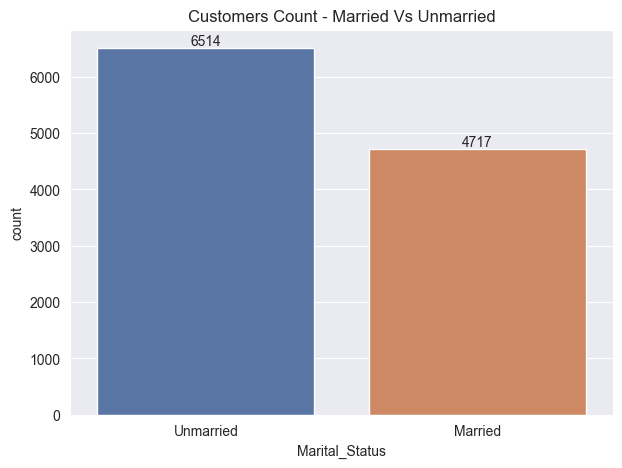

In [27]:
# Marital Status Count

sns.set({'figure.figsize':(7,5)})
ax = sns.countplot(x='Marital_Status', data=df)
plt.title("Customers Count - Married Vs Unmarried")
for bars in ax.containers:
    ax.bar_label(bars)

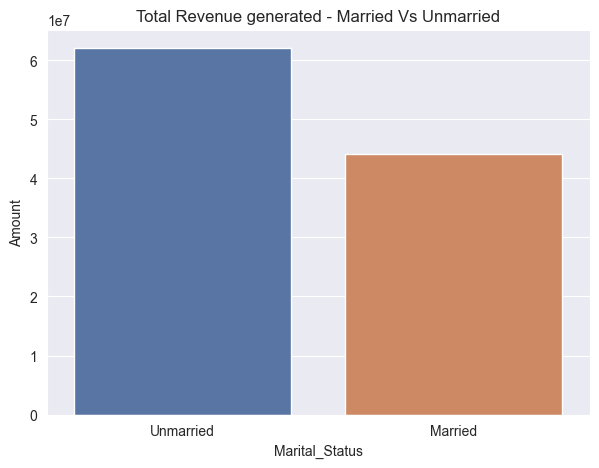

In [28]:
# Marital Status amount spent

sns.set({'figure.figsize':(7,5)})
revenue_Marital_status = df.groupby('Marital_Status', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total Revenue generated - Married Vs Unmarried")
sns.barplot(x='Marital_Status', y='Amount', data=revenue_Marital_status)
plt.show()

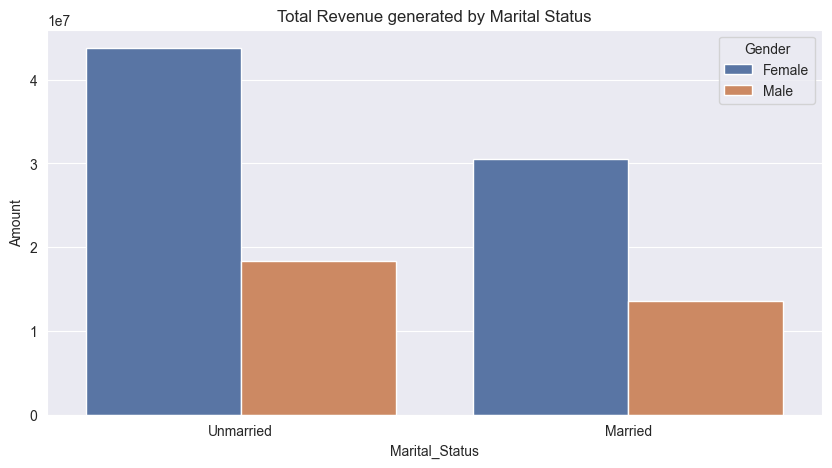

In [29]:
# Revenue generated based on Marital status by gender

sns.set({'figure.figsize':(10,5)})
revenue_Marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total Revenue generated by Marital Status")
sns.barplot(x='Marital_Status', y='Amount', data=revenue_Marital_status, hue='Gender')
plt.show()

#### Insights from Marital Status
as we ca see that purchasing power of unmarried people are more in comparison to married people. Specifically most of the sales coming from Unmarried Females and the second highest is married female

# State

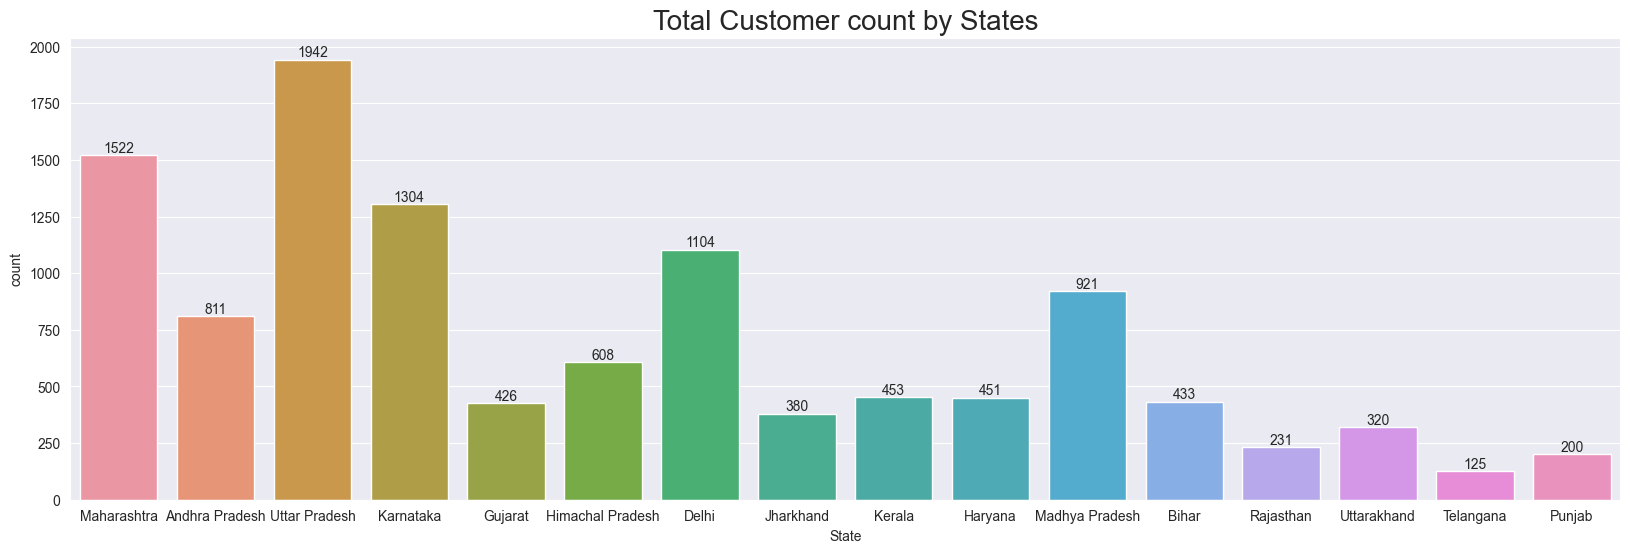

In [30]:
# count by state

sns.set({'figure.figsize':(20,6)})
ax = sns.countplot(x='State', data=df)
plt.title('Total Customer count by States', fontsize=20)
for bars in ax.containers:
    ax.bar_label(bars)



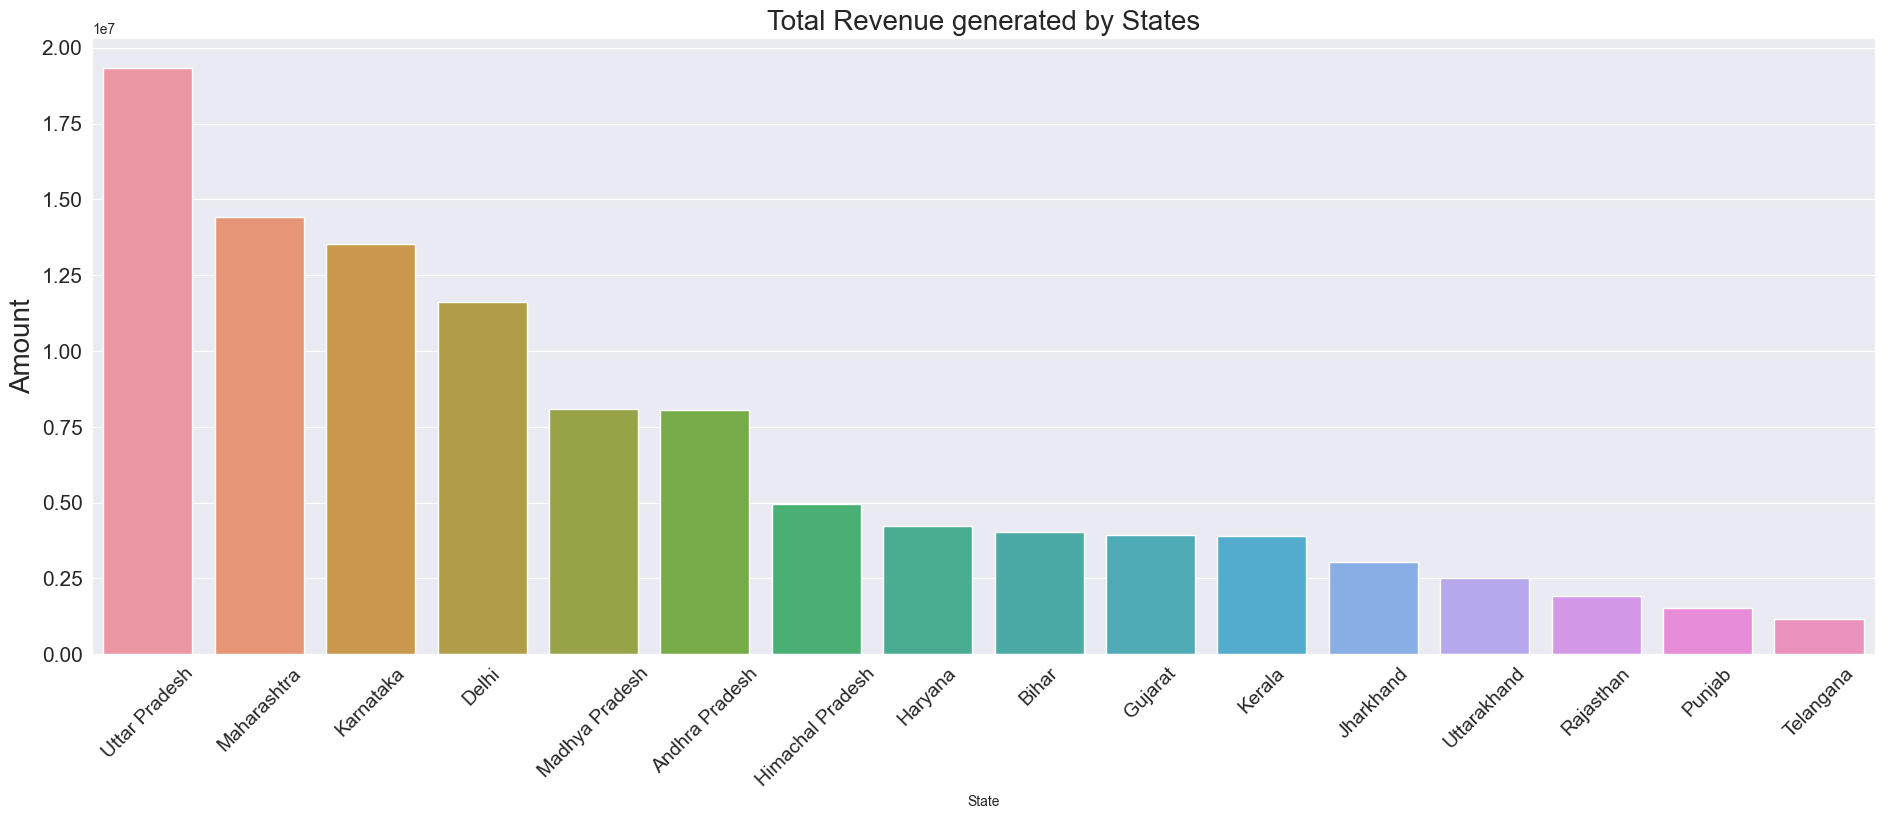

In [31]:
# Revenue generated by states

sns.set({'figure.figsize':(23,8)})
revenue_states = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Total Revenue generated by States", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=15)
plt.ylabel("Revenue generated in 10 millions", fontsize=20)
sns.barplot(x='State', y='Amount', data=revenue_states)
plt.show()

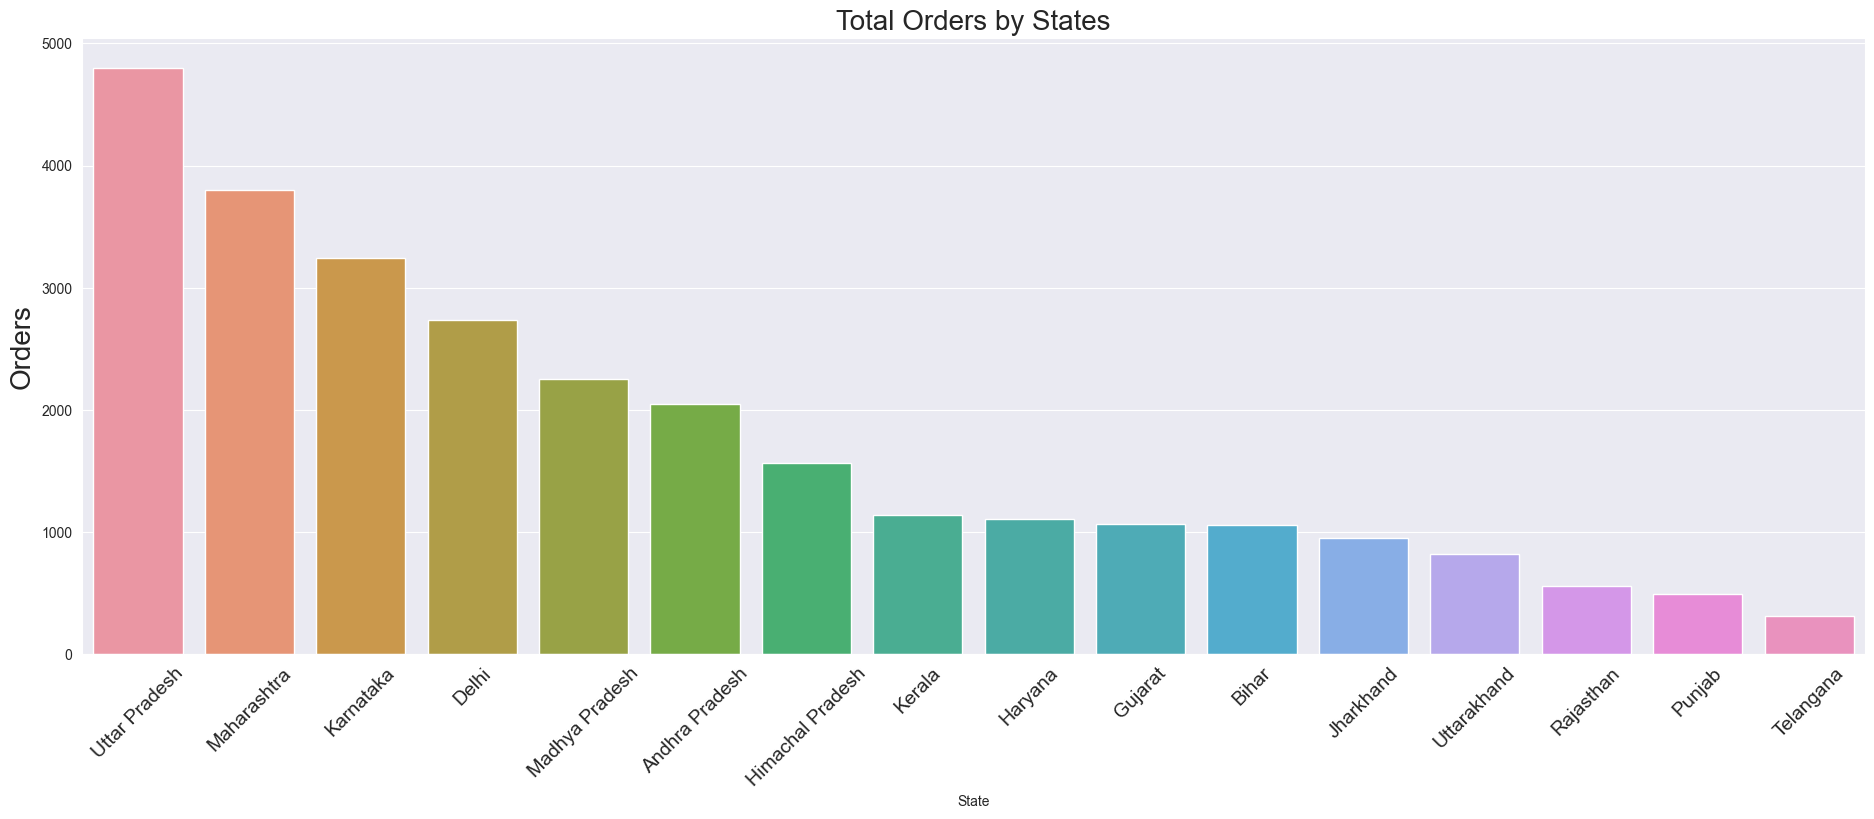

In [32]:
# Most Orders by states

sns.set({'figure.figsize':(23,8)})
orders_states = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
plt.title("Total Orders by States", fontsize=20)
plt.ylabel("Orders generated in 10 millions", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
sns.barplot(x='State', y='Orders', data=orders_states)
plt.show()

#### Insights from States
As we can see that Top 5 States with Most orders and Revenue are :

1. Uttar Pradesh
2. Maharashtra
3. Karnataka
4. Delhi
5. Madhya Pradesh

# Zone

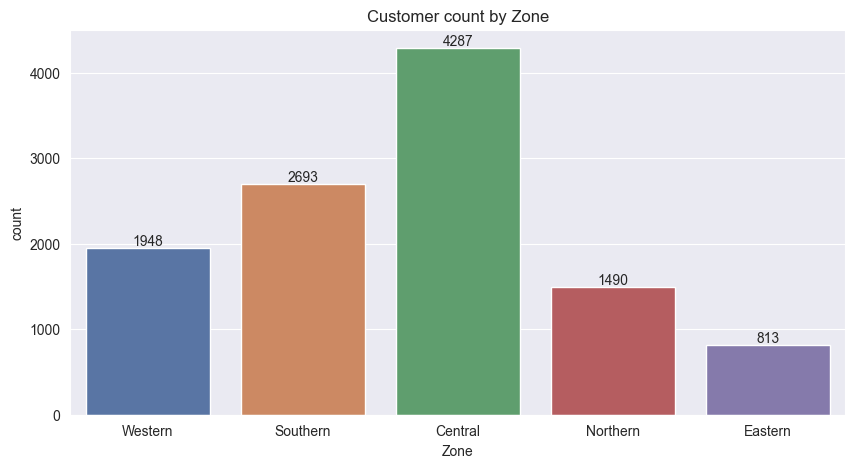

In [33]:
# Zone Count

sns.set({'figure.figsize':(10,5)})
ax = sns.countplot(x='Zone', data=df)
plt.title('Customer count by Zone')
for bars in ax.containers:
    ax.bar_label(bars)

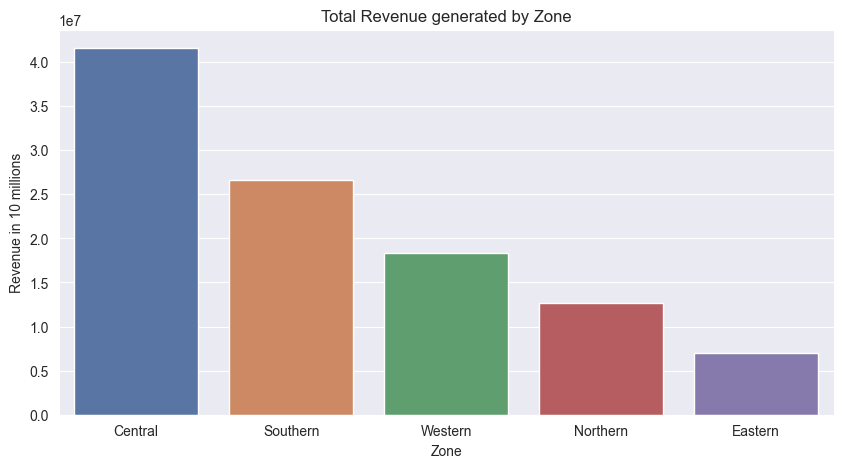

In [34]:
# Revenue by Zone

revenue_zone = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Zone', y='Amount', data=revenue_zone)
plt.title("Total Revenue generated by Zone")
plt.ylabel("Revenue in 10 millions")
plt.show()

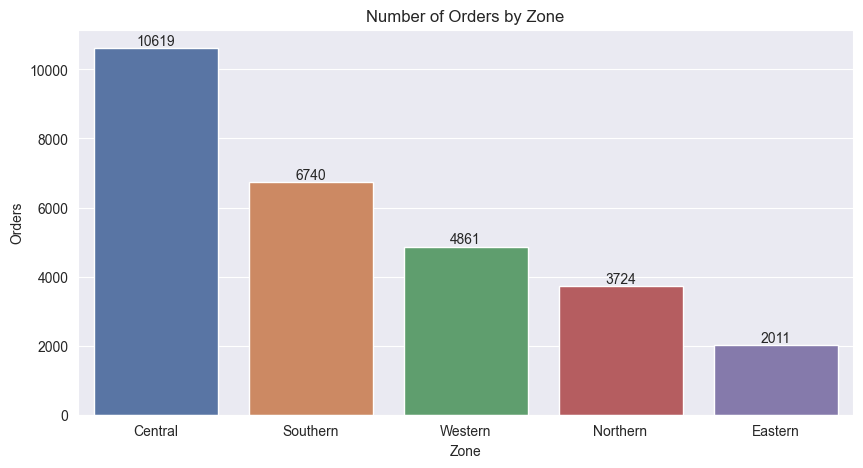

In [35]:
# Orders by Zone

sns.set({'figure.figsize':(10,5)})
orders_zone = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ax = sns.barplot(x='Zone', y='Orders', data=orders_zone)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Orders by Zone")
plt.show()

#### Insights from Zone
as we can see that highest revenue and orders are coming from Central Zone and lowest contributor is Eastern Zone

# Occupation

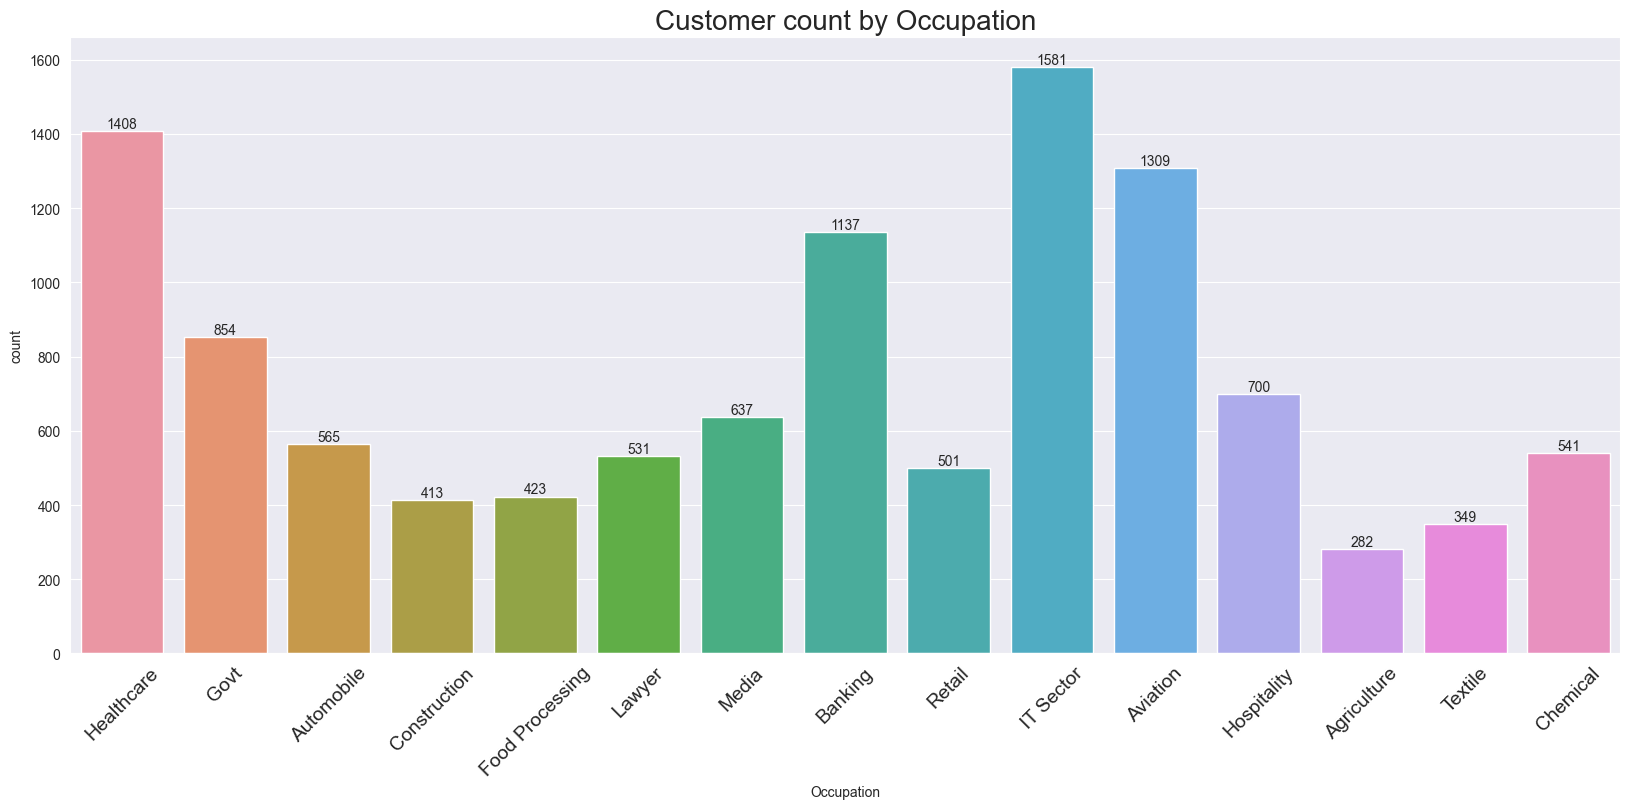

In [36]:
# count Occupation

sns.set({'figure.figsize':(20,8)})
ax = sns.countplot(x='Occupation', data=df)
plt.title('Customer count by Occupation', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
for bars in ax.containers:
    ax.bar_label(bars)

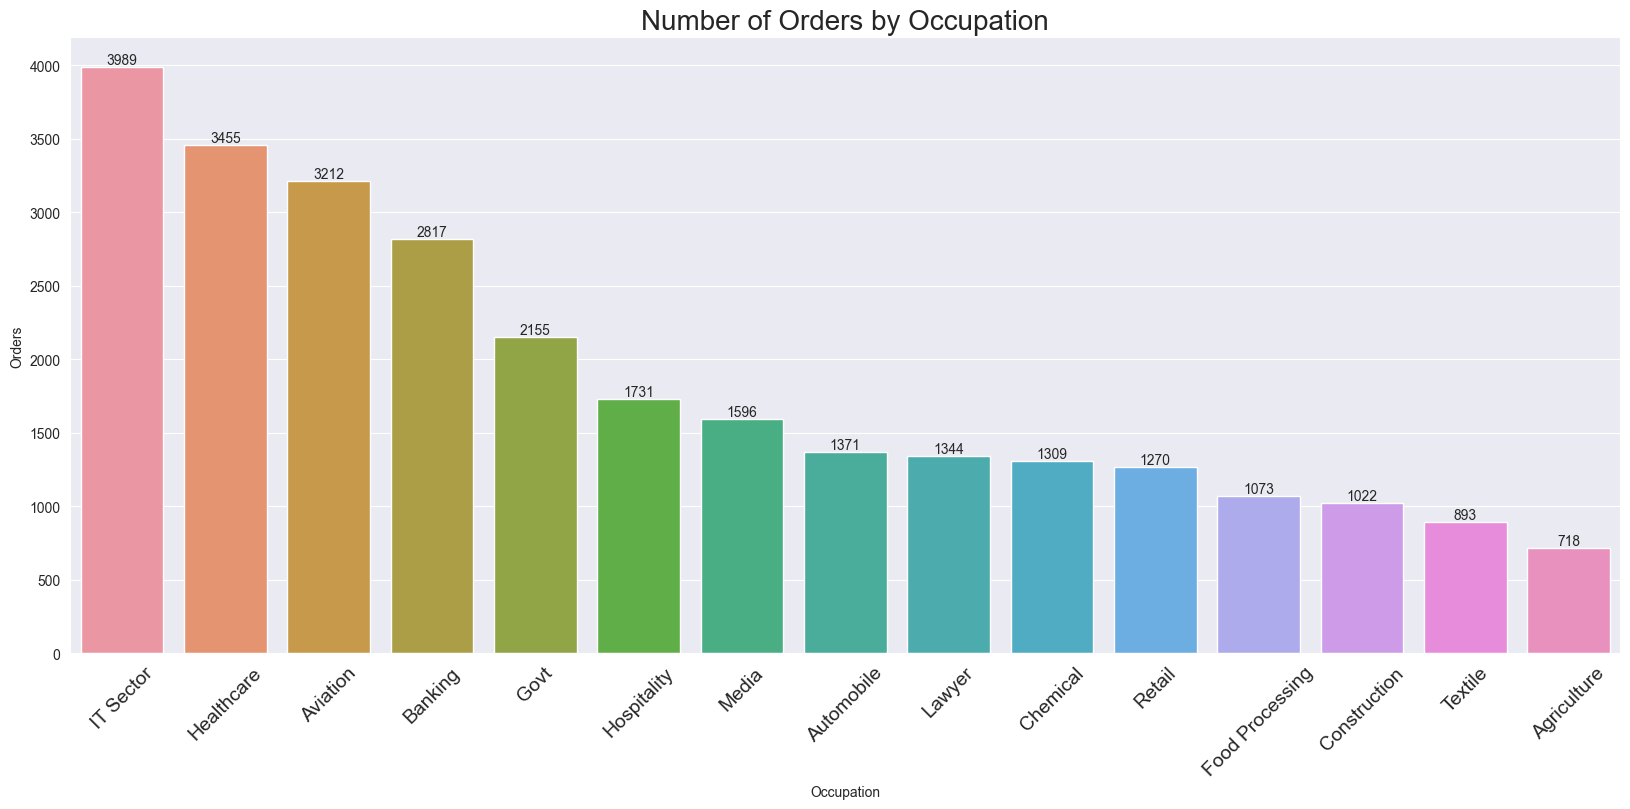

In [37]:
# Orders by Occupation

orders_occupation = df.groupby('Occupation', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
ax = sns.barplot(x='Occupation', y='Orders', data=orders_occupation)
plt.title('Number of Orders by Occupation', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
for bars in ax.containers:
    ax.bar_label(bars)

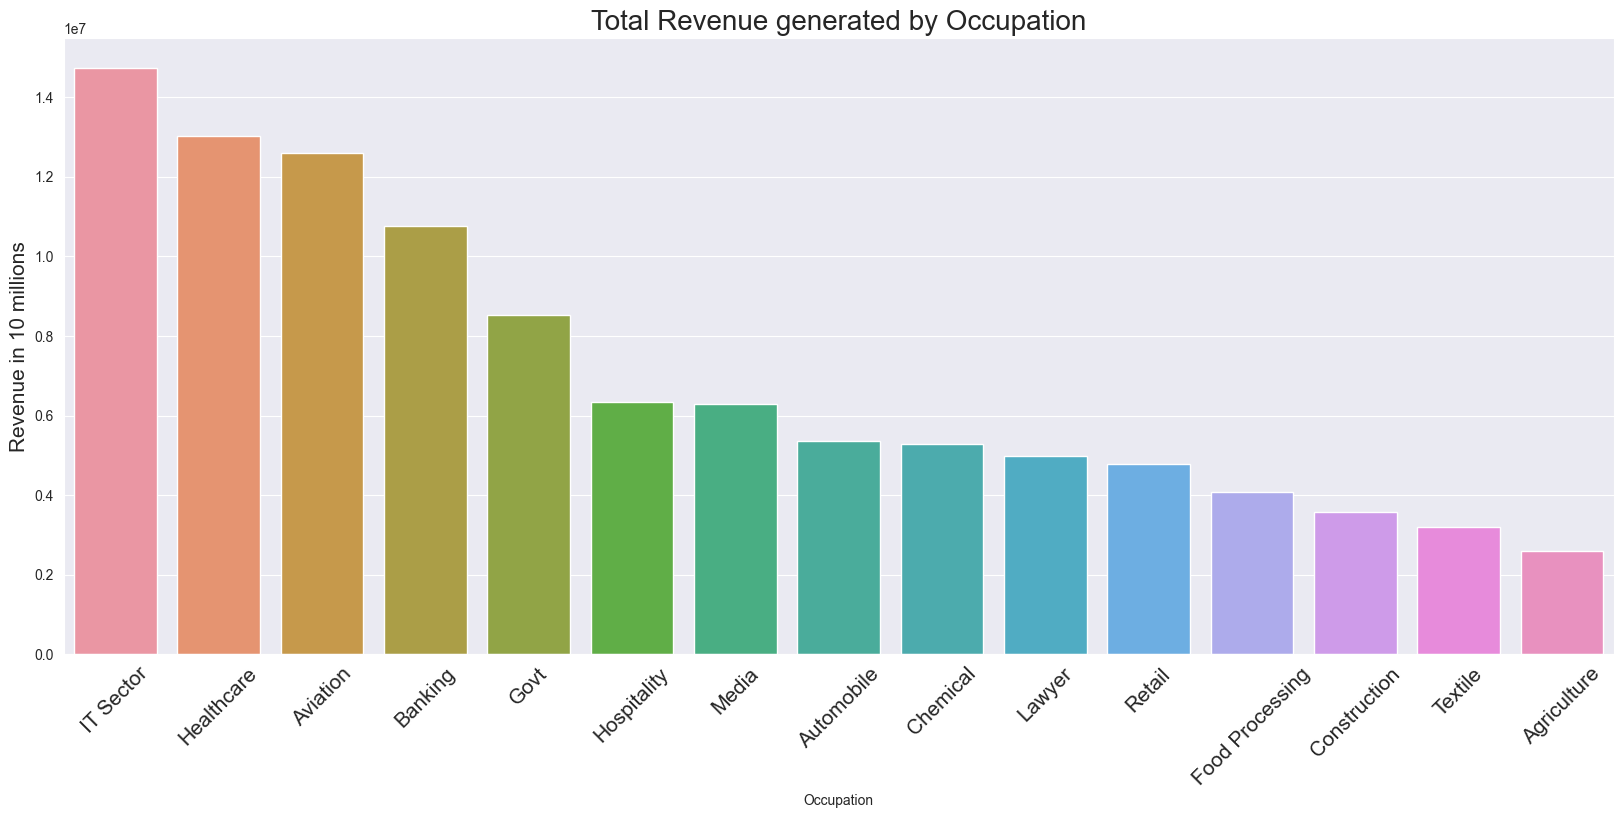

In [38]:
# Revenue generated by occupation

revenue_occupation = df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation', y='Amount', data=revenue_occupation)
plt.title("Total Revenue generated by Occupation", fontsize=20)
plt.ylabel("Revenue in 10 millions", fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.show()

#### Insights from Occupation
as we can see that Most of the Buyers are working in - IT, Healthcare, Aviation, and Banking sector.

# Product Category

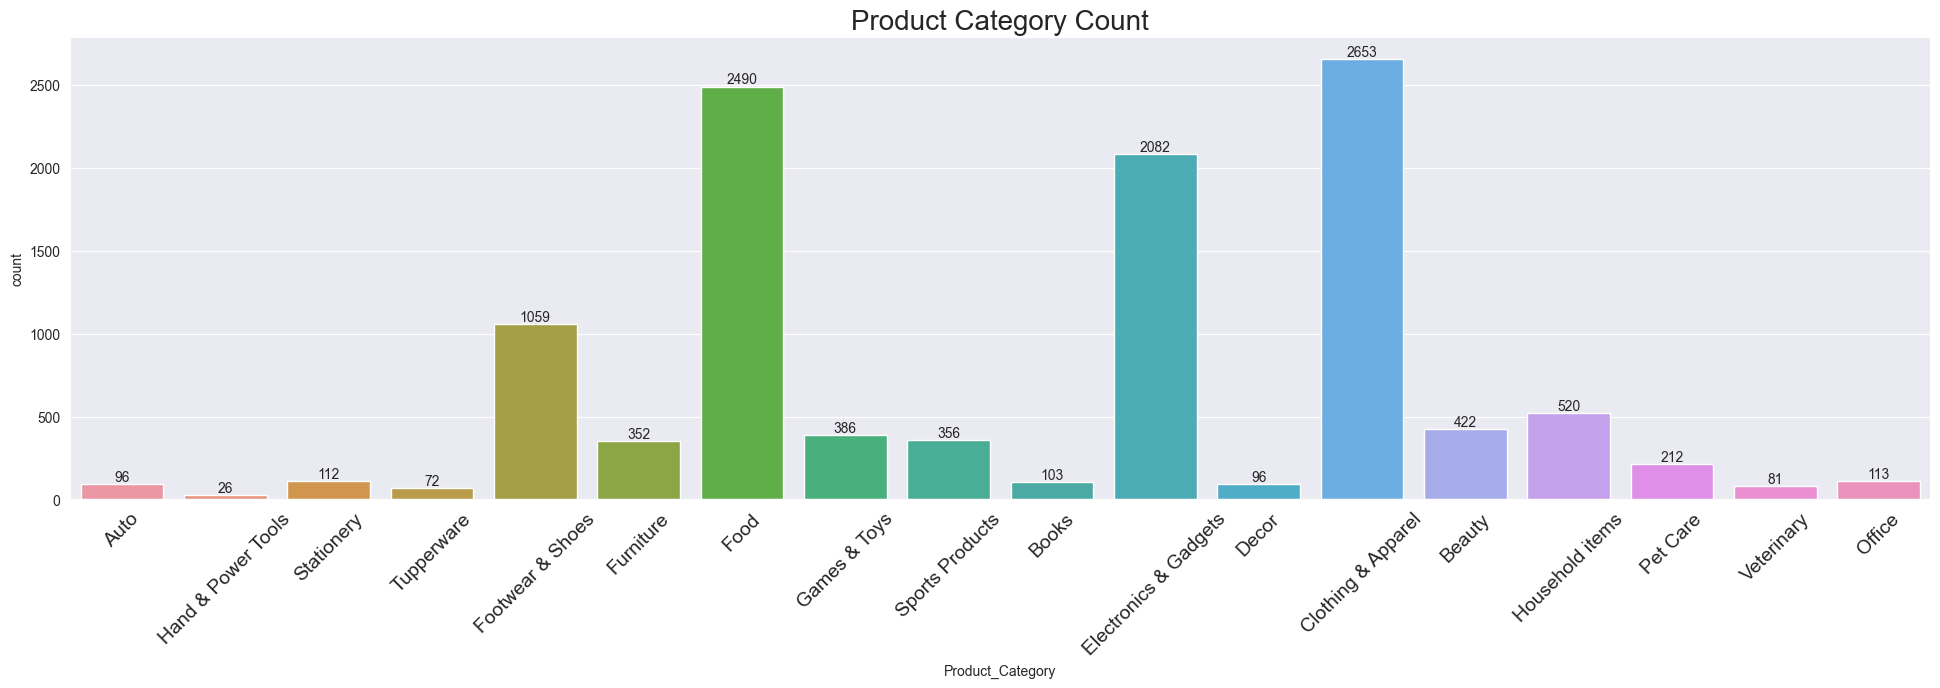

In [39]:
# Product Category Count
sns.color_palette("BuGn_r", 10) 


sns.set({'figure.figsize':(24,6)})
ax = sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Product Category Count", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.show()

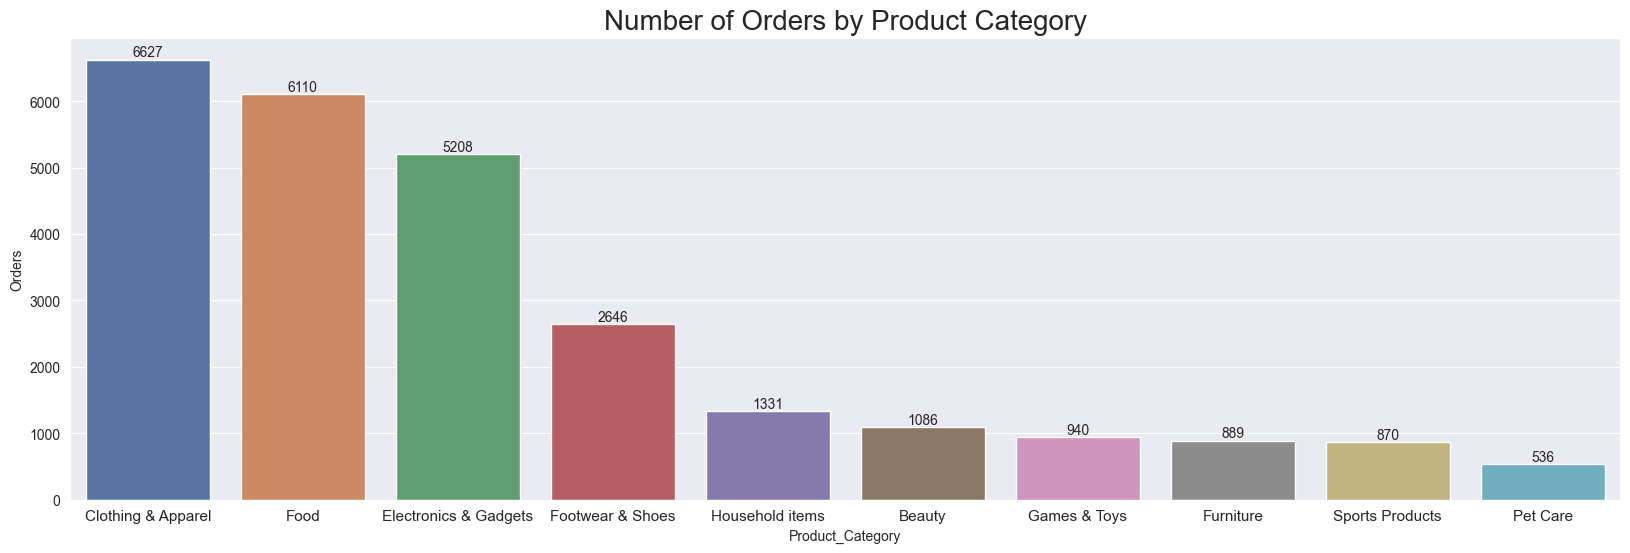

In [40]:
# Product Category Orders

sns.set({'figure.figsize':(20,6)})
orders_P_Cat = df.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
ax = sns.barplot(x='Product_Category', y='Orders', data=orders_P_Cat)
plt.title('Number of Orders by Product Category', fontsize=20)
plt.xticks(fontsize=11)
for bars in ax.containers:
    ax.bar_label(bars)

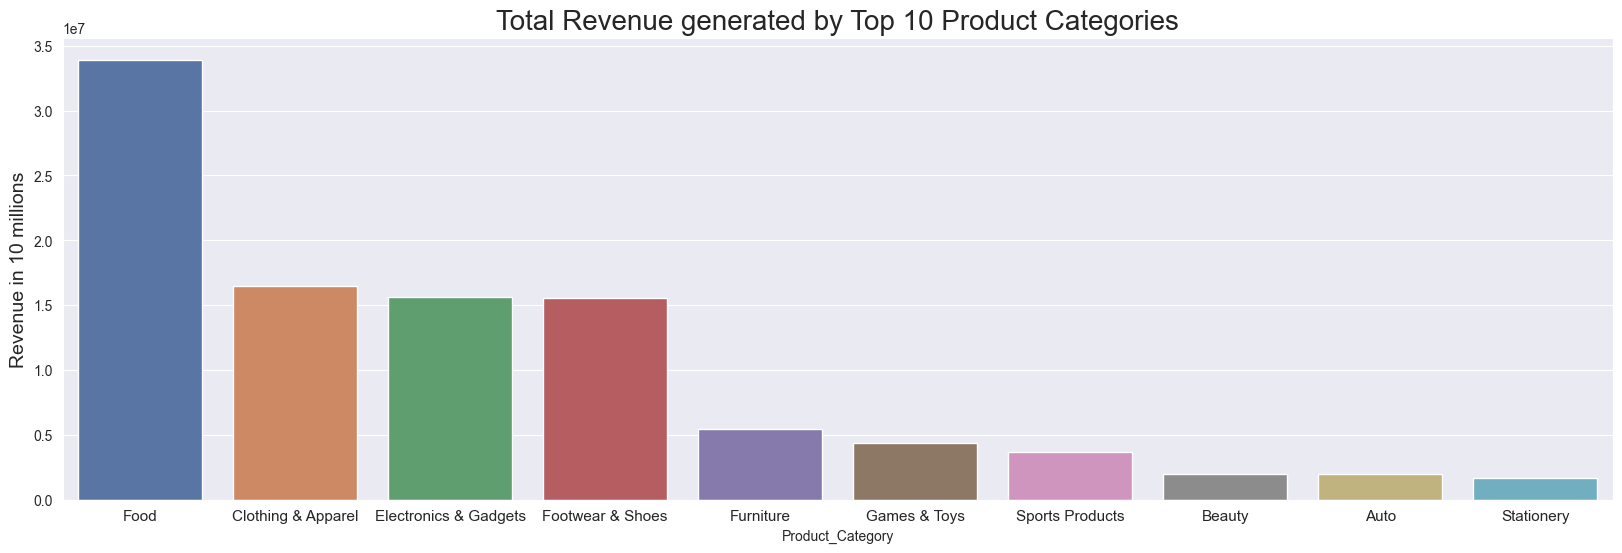

In [41]:
# Revenue by top 10 Product Category

sns.set({'figure.figsize':(20,6)})
revenue_P_Cat = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Amount', data=revenue_P_Cat)
plt.title("Total Revenue generated by Top 10 Product Categories", fontsize=20)
plt.ylabel("Revenue in 10 millions", fontsize=14)
plt.xticks(fontsize=11)
plt.show()

#### Insights from Product Category
as we can see that in terms of Orders Clothing & Apparel Category get the highest orders, but in terms of Revenue Food Category generates the highest revenue.

# Conclusion

* Most of the buyers are unmarried females, and they are in the age group of 26–35 years.
* Most of these females are from Uttar Pradesh, Maharashtra, Karnataka, Delhi and Madhya Pradesh
* Most of the buyers are working in IT, Healthcare, Aviation, Banking and Govt sectors.
* And most of the ordered products are in the Clothing, Food and Electronics Category.

I hope you guys like the analysis, if you find any mistakes or want to suggest something then feel free to comment.



<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
